In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [33]:
cols = ["bike_count", "hour", "temp", "humidity", "windspeed", "visability", "dew_point_temp", "solar_radiation", "rainfall", "snowfall", "functional"]
df = pd.read_csv("SeoulBikeData.csv").drop(["Date", "Seasons", "Holiday"], axis = 1)

In [34]:
df.columns = cols
df["functional"]= (df['functional'] == "Yes").astype(int)
df = df[df['hour'] == 12]
df = df.drop(['hour'], axis = 1)

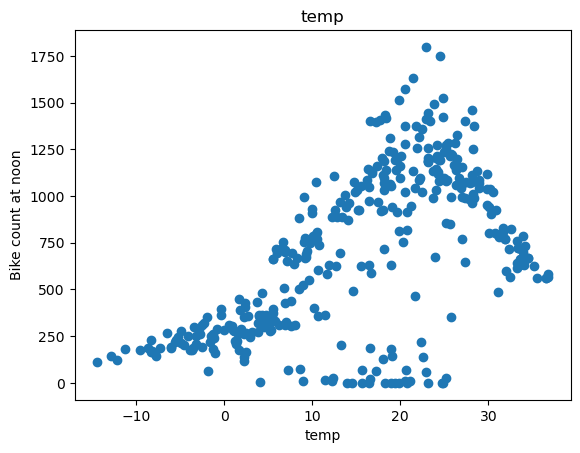

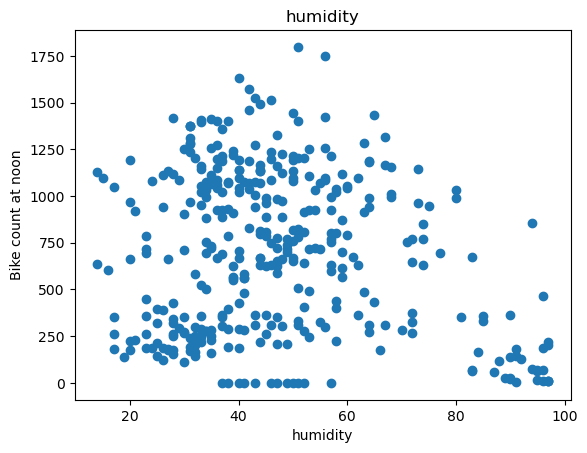

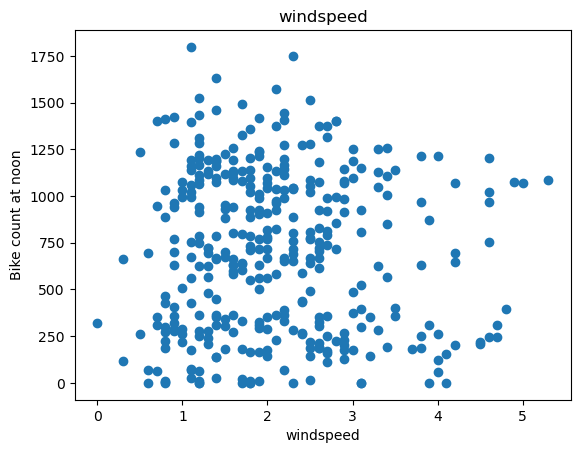

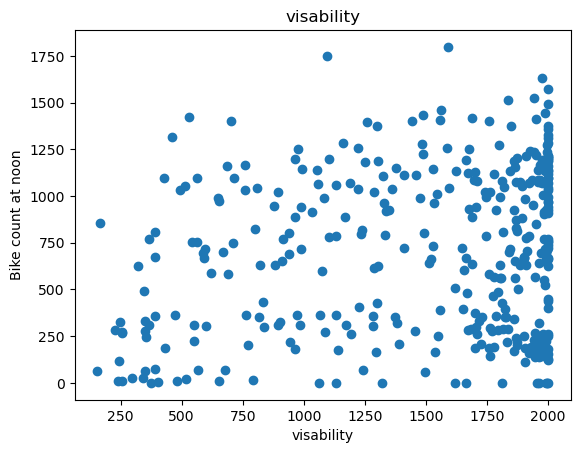

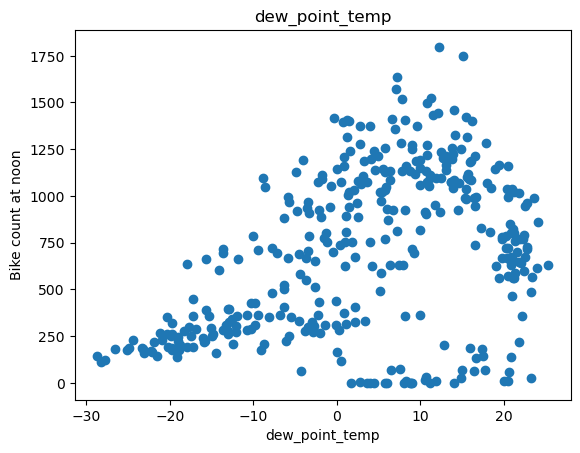

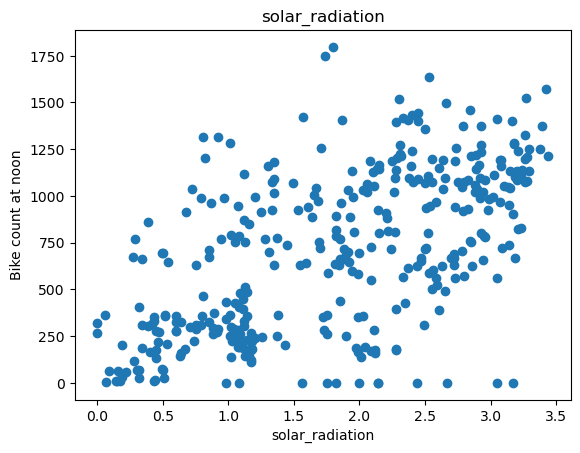

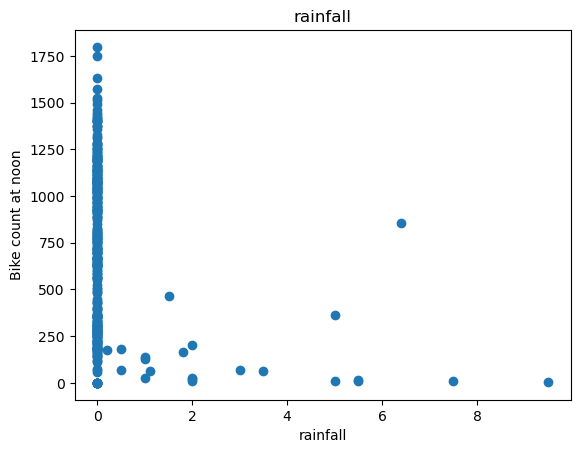

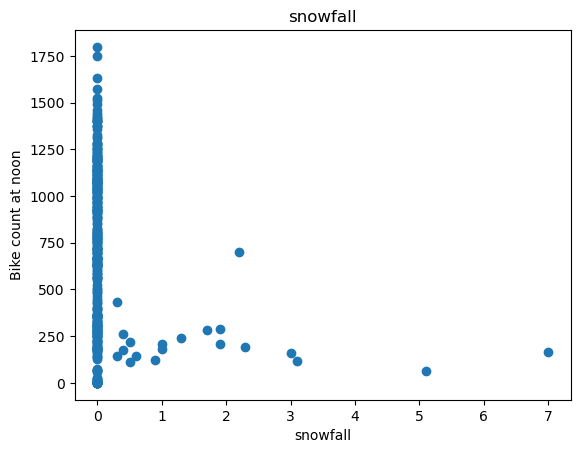

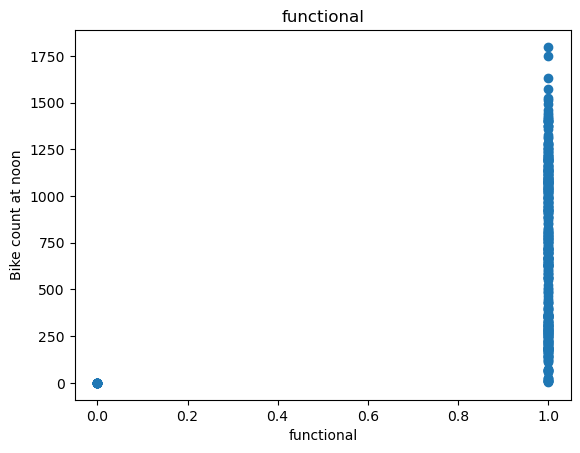

In [35]:
for label in df.columns[1:]:
    plt.scatter(df[label], df["bike_count"])
    plt.title(label)
    plt.ylabel("Bike count at noon")
    plt.xlabel(label)
    plt.show()
    

In [36]:
df = df.drop(["windspeed", "visability", "functional"], axis =1)

# Training validation test ds

In [37]:
# df.sample returns a random sample of our data
train, test, val = np.split(df.sample(frac =1), [int(0.6*len(df)), int(0.8*len(df))])

In [38]:
# Put data into an array such that it can be put into model

def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    
    if x_labels is None:# return the whole array 
        x = dataframe[[c for c in dataframe.columns if c != y_label]].values
        
    else:
        if len(x_labels) == 1:
            x = dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            x = dataframe[x_labelsls].values
    
    y = dataframe[y_label].values.reshape(-1, 1)
    
    data = np.hstack((x, y))
    
    return data, x, y

In [39]:
x, x_train, y_train = get_xy(df, "bike_count", x_labels = ["temp"])
y, x_val, y_val = get_xy(df, "bike_count", x_labels = ["temp"])
z, x_test, y_test = get_xy(df, "bike_count", x_labels = ["temp"])


In [40]:
temp_reg= LinearRegression()
temp_reg.fit(x_train, y_train)


LinearRegression()

In [41]:
temp_reg.score(x_test, y_test) # how assosiated

0.3308671864990531

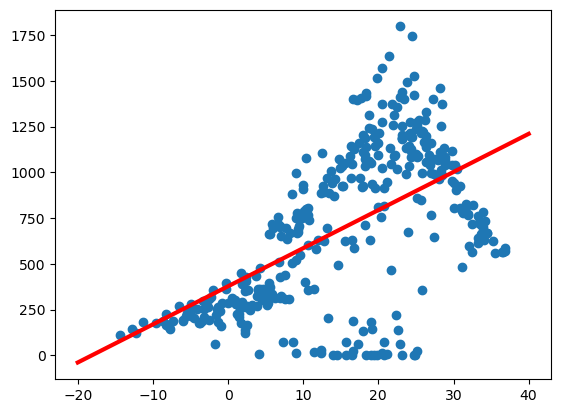

In [42]:
plt.scatter(x_train, y_train)
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), color ='red', linewidth = 3)
plt.show()


In [31]:
for i in range (len(y_test)):
    print(f'Actual: {y_test[i]}, Pred: {temp_reg.predict([x_test[i]])}')

mean_absolute_error(y_test, temp_reg.predict(x_test))

Actual: [449], Pred: [[412.61982775]]
Actual: [479], Pred: [[466.80707561]]
Actual: [333], Pred: [[498.06894938]]
Actual: [393], Pred: [[370.93732939]]
Actual: [321], Pred: [[329.25483104]]
Actual: [405], Pred: [[427.20870217]]
Actual: [431], Pred: [[454.30232611]]
Actual: [355], Pred: [[335.50720579]]
Actual: [427], Pred: [[427.20870217]]
Actual: [119], Pred: [[425.12457726]]
Actual: [247], Pred: [[268.81520842]]
Actual: [228], Pred: [[204.20733597]]
Actual: [267], Pred: [[241.72158449]]
Actual: [278], Pred: [[275.06758317]]
Actual: [309], Pred: [[325.0865812]]
Actual: [252], Pred: [[291.74058252]]
Actual: [216], Pred: [[275.06758317]]
Actual: [62], Pred: [[339.67545563]]
Actual: [191], Pred: [[325.0865812]]
Actual: [209], Pred: [[310.49770678]]
Actual: [290], Pred: [[416.78807759]]
Actual: [301], Pred: [[470.97532545]]
Actual: [325], Pred: [[523.07844839]]
Actual: [4], Pred: [[462.63882578]]
Actual: [221], Pred: [[343.84370546]]
Actual: [262], Pred: [[350.09608022]]
Actual: [230], Pr

277.253147453677